In [2]:
import matplotlib as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('dataset123.csv')

In [4]:
df['age'].unique()


array(['35', '63', '25', '53', '92', '67', '60', '48', '27', '73', '19',
       '72', '16', '54', '39', '38', '33', '45', '21', '51', '64', '40',
       '71', '49', '79', '20', '59', '37', '42', '46', '50', '69', '30',
       '31', '89', '77', '68', '65', '24', '75', '80', '23', '11', '18',
       '62', '76', '22', '70', '47', '56', '26', '28', '83', '74', '78',
       '58', '61', '55', '41', '85', '86', '32', '43', '17', '57', '66',
       '34', '14', '52', '93', '36', '81', '84', '15', '12', '44', '29',
       '82', '87', '88', '7', '1', '13', '10', '90', '94', '4', '8', '5',
       '455', '2', '91', '6', '?'], dtype=object)

In [5]:
df.describe()
df1=df[df['age']=='455']
df1

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
2336,455,F,f,f,f,f,f,f,f,f,...,t,118,t,1.13,t,104,f,?,SVI,negative


In [6]:
df.sex.unique()

array(['F', 'M', '?'], dtype=object)

In [7]:
#df=df.dropna(subset=['sex'])

In [8]:
#df.describe()

In [9]:
df.sex.unique()

array(['F', 'M', '?'], dtype=object)

In [10]:
#df=df[df.sex!='?']

In [11]:
df.shape

(4744, 30)

In [12]:
import sklearn
from sklearn.impute import SimpleImputer

In [13]:
df.nunique()

age                           94
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
sick                           2
pregnant                       2
thyroid_surgery                2
I131_treatment                 2
query_hypothyroid              2
query_hyperthyroid             2
lithium                        2
goitre                         2
tumor                          2
hypopituitary                  2
psych                          2
TSH_measured                   2
TSH                          288
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          242
T4U_measured                   2
T4U                          147
FTI_measured                   2
FTI                          235
TBG_measured                   1
TBG                            1
referral_source                5
target                        10
dtype: int

In [14]:
impute=SimpleImputer(strategy='most_frequent')
impute1=SimpleImputer(strategy='median')


In [15]:
df.replace('?',np.nan,inplace=True)
df[['sex']]=impute.fit_transform(df[['sex']])

In [16]:
df['sex'].nunique()

2

In [17]:
df['sex'].shape

(4744,)

In [18]:
df.info()
df['age'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4744 entries, 0 to 4743
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4743 non-null   object 
 1   sex                        4744 non-null   object 
 2   on_thyroxine               4744 non-null   object 
 3   query_on_thyroxine         4744 non-null   object 
 4   on_antithyroid_medication  4744 non-null   object 
 5   sick                       4744 non-null   object 
 6   pregnant                   4744 non-null   object 
 7   thyroid_surgery            4744 non-null   object 
 8   I131_treatment             4744 non-null   object 
 9   query_hypothyroid          4744 non-null   object 
 10  query_hyperthyroid         4744 non-null   object 
 11  lithium                    4744 non-null   object 
 12  goitre                     4744 non-null   object 
 13  tumor                      4744 non-null   objec

array(['35', '63', '25', '53', '92', '67', '60', '48', '27', '73', '19',
       '72', '16', '54', '39', '38', '33', '45', '21', '51', '64', '40',
       '71', '49', '79', '20', '59', '37', '42', '46', '50', '69', '30',
       '31', '89', '77', '68', '65', '24', '75', '80', '23', '11', '18',
       '62', '76', '22', '70', '47', '56', '26', '28', '83', '74', '78',
       '58', '61', '55', '41', '85', '86', '32', '43', '17', '57', '66',
       '34', '14', '52', '93', '36', '81', '84', '15', '12', '44', '29',
       '82', '87', '88', '7', '1', '13', '10', '90', '94', '4', '8', '5',
       '455', '2', '91', '6', nan], dtype=object)

In [19]:
df['age']=pd.to_numeric(df['age'],errors='coerce')
df=df[df['age']!=455]
mean_age=df['age'].mean()
df['age']=df['age'].fillna(mean_age) #df['age']=impute1.fit_transform(df[['age']])
df['age']=df['age'].round(0).astype('int')
df['age'].unique()

<ipython-input-19-17bd11929f6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=df['age'].fillna(mean_age) #df['age']=impute1.fit_transform(df[['age']])
<ipython-input-19-17bd11929f6f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=df['age'].round(0).astype('int')


array([35, 63, 25, 53, 92, 67, 60, 48, 27, 73, 19, 72, 16, 54, 39, 38, 33,
       45, 21, 51, 64, 40, 71, 49, 79, 20, 59, 37, 42, 46, 50, 69, 30, 31,
       89, 77, 68, 65, 24, 75, 80, 23, 11, 18, 62, 76, 22, 70, 47, 56, 26,
       28, 83, 74, 78, 58, 61, 55, 41, 85, 86, 32, 43, 17, 57, 66, 34, 14,
       52, 93, 36, 81, 84, 15, 12, 44, 29, 82, 87, 88,  7,  1, 13, 10, 90,
       94,  4,  8,  5,  2, 91,  6])

In [20]:
#df['sex'].unique()

In [21]:
#row=df[df[['age']]!=int]

In [22]:
#row

In [23]:
df_values=['negative','compensated hypothyroid','primary thyroid']
df= df[df['target'].isin(df_values)]
df['target'].value_counts()


target
negative                   4427
compensated hypothyroid     154
Name: count, dtype: int64

In [24]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
0,35,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
1,63,M,f,f,f,f,f,f,f,f,...,t,108,t,0.96,t,113,f,NaN,SVI,negative
2,25,F,f,f,f,f,f,f,f,f,...,t,61,t,0.82,t,75,f,NaN,SVHD,negative
3,53,F,f,f,f,f,f,f,f,t,...,t,145,t,1.03,t,141,f,NaN,other,negative
4,92,F,f,f,f,f,f,f,f,f,...,t,120,t,0.84,t,143,f,NaN,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,30,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
4740,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,NaN,SVI,negative
4741,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,NaN,other,negative
4742,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,NaN,SVI,negative


In [25]:
df['TSH']=pd.to_numeric(df['TSH'],errors='coerce')
df['T3']=pd.to_numeric(df['T3'],errors='coerce')
df['TT4']=pd.to_numeric(df['TT4'],errors='coerce')
df['FTI']=pd.to_numeric(df['FTI'],errors='coerce')
df['T4U']=pd.to_numeric(df['T4U'],errors='coerce')




In [26]:
df['TSH']

0        NaN
1       3.50
2       4.60
3       0.25
4       0.70
        ... 
4739     NaN
4740    1.00
4741    5.10
4742    0.70
4743    1.00
Name: TSH, Length: 4581, dtype: float64

In [27]:
df['TSH']=impute1.fit_transform(df[['TSH']])
df['TSH']

0       1.30
1       3.50
2       4.60
3       0.25
4       0.70
        ... 
4739    1.30
4740    1.00
4741    5.10
4742    0.70
4743    1.00
Name: TSH, Length: 4581, dtype: float64

In [28]:
df['TSH'].unique()

array([1.30e+00, 3.50e+00, 4.60e+00, 2.50e-01, 7.00e-01, 8.10e-01,
       1.20e+00, 2.70e+01, 2.80e+00, 2.60e+00, 4.40e+00, 3.10e+00,
       1.10e+00, 4.50e+00, 1.40e-01, 6.00e-02, 7.40e+00, 2.30e+00,
       2.00e+00, 5.80e+00, 7.80e-01, 4.00e+00, 1.00e+00, 5.20e-01,
       4.00e-01, 3.00e-01, 1.00e-01, 1.90e+00, 1.70e+01, 2.00e-01,
       1.50e-02, 1.20e+01, 1.50e+00, 2.90e+00, 5.00e-02, 4.20e-01,
       1.40e+00, 5.00e+00, 5.00e-01, 9.00e-01, 2.10e+00, 1.50e-01,
       1.80e+00, 7.60e+00, 1.60e+00, 7.90e-01, 3.70e+00, 7.70e-01,
       6.40e-01, 2.70e+00, 9.80e-01, 2.50e-02, 9.30e-01, 5.80e-01,
       3.40e-01, 3.40e+00, 8.60e-01, 4.70e-01, 1.70e+00, 9.50e-01,
       3.40e+01, 5.00e-03, 1.44e+01, 4.80e+00, 8.20e-01, 2.80e+01,
       4.40e-01, 2.40e+00, 3.20e+00, 5.80e+01, 7.40e-01, 1.00e-02,
       6.70e-01, 2.10e+01, 8.00e-01, 2.00e-02, 1.65e+02, 4.20e+00,
       8.90e+00, 7.00e+00, 4.70e+00, 5.40e+00, 4.50e-01, 3.00e+00,
       8.30e-01, 8.40e-01, 4.90e+00, 6.30e-01, 3.30e+00, 2.50e

In [29]:
df['T3'].unique()

array([  nan,  2.5 ,  2.4 ,  2.1 ,  1.3 ,  2.6 ,  1.8 ,  2.2 ,  1.2 ,
        2.8 ,  3.4 ,  1.4 ,  1.7 ,  2.3 ,  1.1 ,  1.6 ,  3.7 ,  3.  ,
        1.5 ,  1.9 ,  2.7 ,  0.8 ,  4.2 ,  2.  ,  1.  ,  4.1 ,  3.2 ,
        2.9 ,  0.4 ,  0.7 ,  3.8 ,  0.6 ,  0.9 ,  0.3 ,  3.1 ,  1.44,
        3.3 ,  7.6 ,  3.6 ,  5.7 ,  4.5 ,  0.2 ,  0.5 ,  3.5 ,  4.7 ,
        3.9 ,  5.5 ,  4.8 ,  4.3 ,  0.05,  5.4 ,  4.  ,  5.2 ,  5.  ,
        6.  ,  5.3 ,  4.6 ,  7.3 ,  6.7 ,  6.1 ,  0.1 ,  4.9 , 10.6 ,
        5.1 ,  7.  ,  6.2 ,  4.4 ,  7.1 ,  8.5 ,  6.6 ])

In [30]:

df['T3']=impute1.fit_transform(df[['T3']])
df['T3'].unique()

array([ 2.  ,  2.5 ,  2.4 ,  2.1 ,  1.3 ,  2.6 ,  1.8 ,  2.2 ,  1.2 ,
        2.8 ,  3.4 ,  1.4 ,  1.7 ,  2.3 ,  1.1 ,  1.6 ,  3.7 ,  3.  ,
        1.5 ,  1.9 ,  2.7 ,  0.8 ,  4.2 ,  1.  ,  4.1 ,  3.2 ,  2.9 ,
        0.4 ,  0.7 ,  3.8 ,  0.6 ,  0.9 ,  0.3 ,  3.1 ,  1.44,  3.3 ,
        7.6 ,  3.6 ,  5.7 ,  4.5 ,  0.2 ,  0.5 ,  3.5 ,  4.7 ,  3.9 ,
        5.5 ,  4.8 ,  4.3 ,  0.05,  5.4 ,  4.  ,  5.2 ,  5.  ,  6.  ,
        5.3 ,  4.6 ,  7.3 ,  6.7 ,  6.1 ,  0.1 ,  4.9 , 10.6 ,  5.1 ,
        7.  ,  6.2 ,  4.4 ,  7.1 ,  8.5 ,  6.6 ])

In [31]:
df['TT4'].unique()
df['TT4']=impute1.fit_transform(df[['TT4']])
df['TT4'].unique()



array([104. , 108. ,  61. , 145. , 120. ,  84. , 117. ,  65. , 112. ,
        94. ,  95. , 131. , 105. , 148. ,  81. , 132. ,  82. ,  92. ,
       133. , 261. , 106. ,  90. , 111. ,  96. , 103. ,  66. , 162. ,
        87. , 135. ,  89. , 140. , 125. ,  68. , 178. , 114. ,  98. ,
        76. , 188. , 122. , 141. ,  88. ,  99. , 119. ,  93. , 164. ,
       210. , 123. , 160. , 110. , 100. ,  83. , 107. , 158. , 183. ,
       118. , 163. , 102. ,  69. , 137. , 161. ,  73. ,  85. , 248. ,
       152. , 155. ,  78. , 139. , 129. ,  74. ,  51. , 113. ,  97. ,
        72. ,  86. , 109. ,  75. ,  77. ,  25. , 121. , 124. , 171. ,
        53. ,  46. ,  67. , 203. ,  17. ,  71. ,  79. , 151. , 147. ,
       115. , 138. , 157. , 150. , 146. , 220. , 197. , 134. , 136. ,
       116. ,  91. , 149. ,  41. , 126. ,  45. , 179. ,   9.5, 127. ,
        52. ,  19. ,  31. , 175. , 101. , 130. , 159. , 212. ,  57. ,
        32. , 222. , 168. , 142. , 186. ,  10. , 153. ,  44. ,  70. ,
        49. ,  80. ,

In [32]:
df['T4U'].unique()
df['T4U']=impute1.fit_transform(df[['T4U']])
df['T4U'].unique()

array([0.97 , 0.96 , 0.82 , 1.03 , 0.84 , 0.83 , 1.31 , 0.99 , 0.92 ,
       0.89 , 1.11 , 0.95 , 0.5  , 1.07 , 1.23 , 1.08 , 0.87 , 0.88 ,
       1.16 , 2.32 , 1.02 , 0.69 , 0.91 , 1.   , 1.47 , 1.29 , 1.01 ,
       0.62 , 1.26 , 1.06 , 1.1  , 0.8  , 0.9  , 0.98 , 1.09 , 1.05 ,
       1.12 , 0.86 , 1.55 , 0.93 , 1.63 , 0.74 , 0.94 , 0.65 , 0.79 ,
       1.5  , 1.4  , 1.14 , 0.71 , 0.77 , 0.68 , 1.27 , 0.6  , 0.67 ,
       1.21 , 1.36 , 1.17 , 1.2  , 0.76 , 1.19 , 1.18 , 0.75 , 0.78 ,
       1.15 , 0.85 , 1.04 , 0.72 , 1.71 , 1.25 , 1.68 , 1.65 , 0.81 ,
       1.52 , 1.13 , 0.46 , 0.73 , 0.63 , 1.24 , 1.82 , 1.57 , 0.64 ,
       1.41 , 1.7  , 0.48 , 0.7  , 0.54 , 1.42 , 1.22 , 1.75 , 1.53 ,
       1.45 , 1.51 , 1.32 , 1.54 , 1.48 , 0.47 , 0.59 , 1.35 , 1.83 ,
       1.38 , 1.3  , 1.34 , 0.36 , 2.01 , 1.28 , 0.25 , 0.56 , 1.58 ,
       1.33 , 0.53 , 1.44 , 0.61 , 1.43 , 1.46 , 1.66 , 0.52 , 1.39 ,
       1.93 , 0.58 , 1.67 , 0.66 , 1.77 , 1.59 , 1.97 , 1.69 , 1.74 ,
       2.03 , 1.73 ,

In [33]:

df['FTI']=impute1.fit_transform(df[['FTI']])
df['FTI'].unique()

array([107. , 113. ,  75. , 141. , 143. , 101. ,  90. ,  66. , 121. ,
       106. ,  85. , 138. , 265. , 118. , 100. ,  94. , 152. ,  92. ,
       111. , 115. ,  78. , 109. , 140. , 114. ,  88. ,  65. , 110. ,
       105. , 160. , 124. , 142. , 117. , 104. , 150. , 108. ,  86. ,
       194. , 130. , 103. , 199. , 147. , 125. ,  76. ,  97. , 120. ,
       178. ,  99. , 148. ,  95. ,  93. , 126. , 153. ,  82. , 131. ,
       135. , 165. , 154. , 119. ,  87. , 196. , 168. , 132. ,  80. ,
       162. ,  20. , 145. ,  89. , 174. ,  61. , 200. ,  14. ,  77. ,
        79. ,  84. , 122. ,  98. , 198. , 166. , 128. , 136. ,  46. ,
       213. ,  81. , 149. ,  96. , 179. , 112. ,  36. , 129. ,  69. ,
       137. , 139. , 102. ,  72. ,  83. ,  17. , 123. , 134. ,  63. ,
       181. , 151. ,  51. ,  71. , 183. , 133. , 116. , 170. ,  91. ,
        56. , 155. , 127. , 144. ,   8.4,  52. , 157. , 146. ,  58. ,
       291. ,  55. ,  68. ,  73. , 171. , 245. , 161. ,  49. , 204. ,
        67. ,  70. ,

In [34]:
df.drop(['TBG','TBG_measured','referral_source'],axis=1,inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4581 entries, 0 to 4743
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4581 non-null   int64  
 1   sex                        4581 non-null   object 
 2   on_thyroxine               4581 non-null   object 
 3   query_on_thyroxine         4581 non-null   object 
 4   on_antithyroid_medication  4581 non-null   object 
 5   sick                       4581 non-null   object 
 6   pregnant                   4581 non-null   object 
 7   thyroid_surgery            4581 non-null   object 
 8   I131_treatment             4581 non-null   object 
 9   query_hypothyroid          4581 non-null   object 
 10  query_hyperthyroid         4581 non-null   object 
 11  lithium                    4581 non-null   object 
 12  goitre                     4581 non-null   object 
 13  tumor                      4581 non-null   object 
 1

In [36]:
#visualizing


<ipython-input-37-644c50c6d238>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


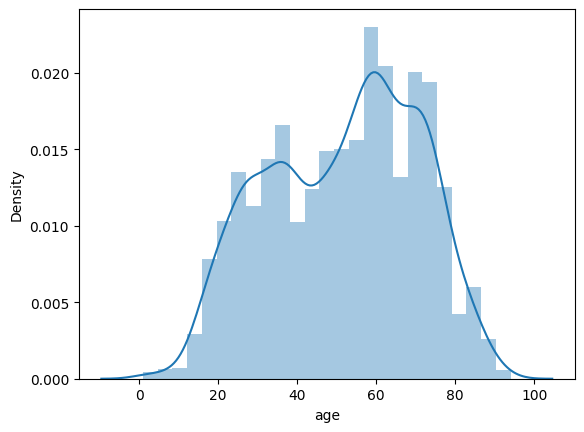

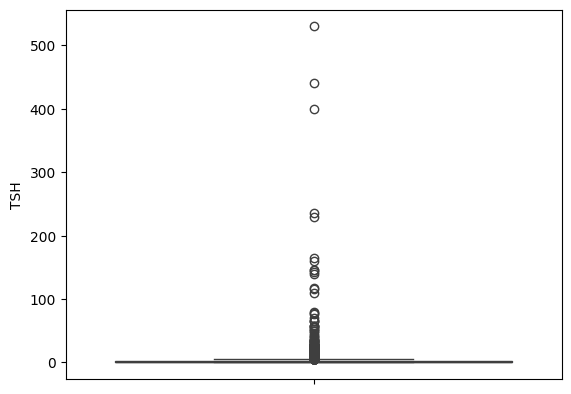

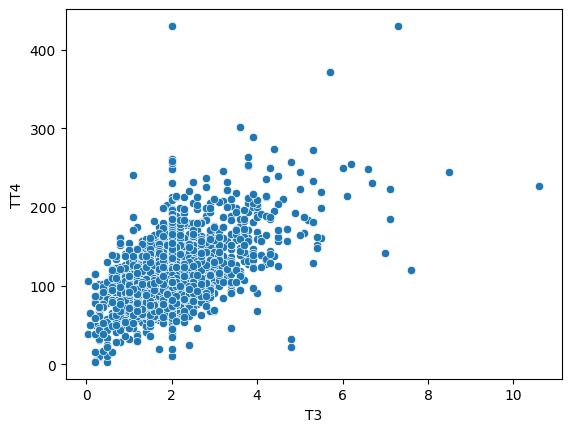

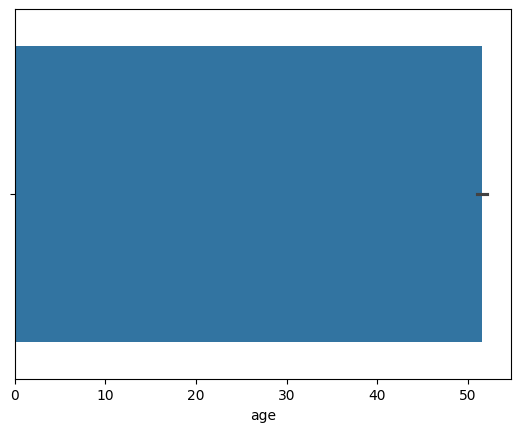

In [37]:
import matplotlib.pyplot as plt

# 1. Distribution of age
sns.distplot(df['age'])
plt.show()

# 2. Boxplot of TSH
sns.boxplot(df['TSH'])
plt.show()

# 3. Scatter plot of T3 vs TT4
sns.scatterplot(x='T3', y='TT4', data=df)
plt.show()

# 4. Bar plot of target variable
sns.barplot(x='age', data=df)
plt.show()


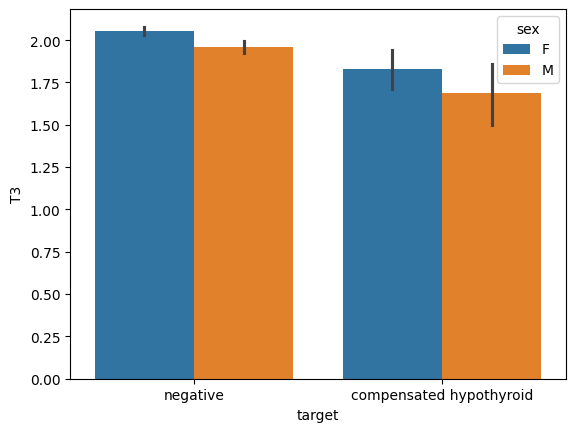

In [38]:
# prompt: visualizing between t3 and target

sns.barplot(x='target', y='T3', data=df,hue='sex')
plt.show()


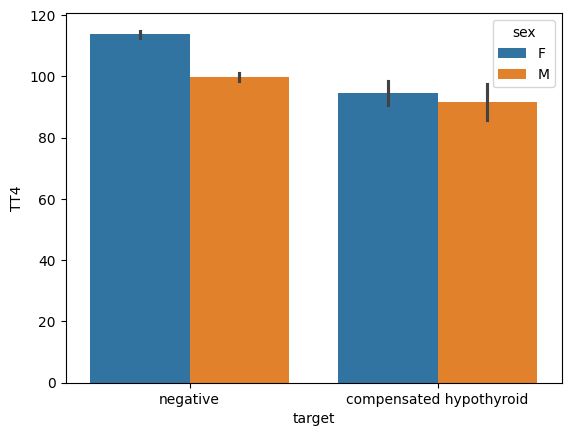

In [39]:
# prompt: graph between tt4 and target by coluring sex

sns.barplot(x='target', y='TT4', data=df, hue='sex')
plt.show()


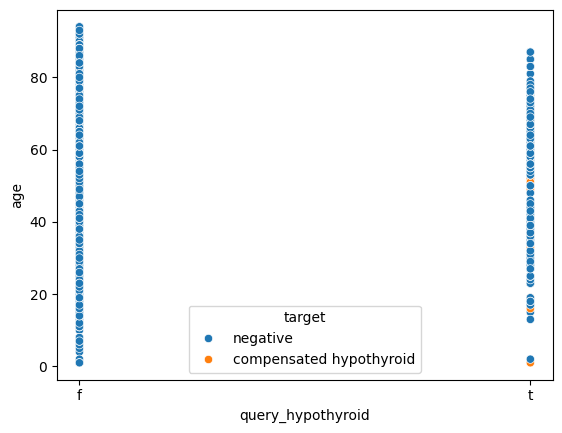

In [40]:
# prompt: plot graph between query_thyroid and target

sns.scatterplot(x='query_hypothyroid', y='age', data=df, hue='target')
plt.show()


In [41]:
#pd.get_dummies one-hot-encoding

In [42]:
df=pd.get_dummies(df,columns=['sex','on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_on_thyroxine','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured'])

In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4581 entries, 0 to 4743
Data columns (total 47 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          4581 non-null   int64  
 1   TSH                          4581 non-null   float64
 2   T3                           4581 non-null   float64
 3   TT4                          4581 non-null   float64
 4   T4U                          4581 non-null   float64
 5   FTI                          4581 non-null   float64
 6   target                       4581 non-null   object 
 7   sex_F                        4581 non-null   bool   
 8   sex_M                        4581 non-null   bool   
 9   on_thyroxine_f               4581 non-null   bool   
 10  on_thyroxine_t               4581 non-null   bool   
 11  on_antithyroid_medication_f  4581 non-null   bool   
 12  on_antithyroid_medication_t  4581 non-null   bool   
 13  sick_f                 

In [44]:
#spliting

In [45]:
x=df.drop(['target'],axis=1)
y=df['target']
df=df.drop_duplicates()


In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
!pip install imblearn --quiet
from imblearn.over_sampling import SMOTE

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [49]:
df['target'].value_counts()


target
negative                   3488
compensated hypothyroid     154
Name: count, dtype: int64

In [50]:
os=SMOTE(random_state=42,k_neighbors=5)
x_train,y_train=os.fit_resample(x_train,y_train)

In [51]:
y_train.value_counts()

target
negative                   3534
compensated hypothyroid    3534
Name: count, dtype: int64

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV


In [53]:
'''xgb=XGBClassifier(random_state=42,max_depth=4,n_estimators=100,bootstrap=True,max_leaf_nodes=10,objective='multi:softmax', num_class=len(set(y_train)))
xgb.fit(x_train,y_train)'''

"xgb=XGBClassifier(random_state=42,max_depth=4,n_estimators=100,bootstrap=True,max_leaf_nodes=10,objective='multi:softmax', num_class=len(set(y_train)))\nxgb.fit(x_train,y_train)"

In [54]:
'''rf=RandomForestClassifier(random_state=42,'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50)
rf.fit(x_train,y_train)'''

"rf=RandomForestClassifier(random_state=42,'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50)\nrf.fit(x_train,y_train)"

In [55]:
rf = RandomForestClassifier(random_state=42, bootstrap=False, max_depth=None,
                            max_features='sqrt', min_samples_leaf=2,
                            min_samples_split=2, n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, random_state=42)

In [56]:
x_pred=rf.predict(x_train)
y_pred=rf.predict(x_test)

In [57]:

print(classification_report(y_test,y_pred))

                         precision    recall  f1-score   support

compensated hypothyroid       0.84      0.88      0.86        24
               negative       1.00      1.00      1.00       893

               accuracy                           0.99       917
              macro avg       0.92      0.94      0.93       917
           weighted avg       0.99      0.99      0.99       917



In [58]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4581 entries, 0 to 4743
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          4581 non-null   int64  
 1   TSH                          4581 non-null   float64
 2   T3                           4581 non-null   float64
 3   TT4                          4581 non-null   float64
 4   T4U                          4581 non-null   float64
 5   FTI                          4581 non-null   float64
 6   sex_F                        4581 non-null   bool   
 7   sex_M                        4581 non-null   bool   
 8   on_thyroxine_f               4581 non-null   bool   
 9   on_thyroxine_t               4581 non-null   bool   
 10  on_antithyroid_medication_f  4581 non-null   bool   
 11  on_antithyroid_medication_t  4581 non-null   bool   
 12  sick_f                       4581 non-null   bool   
 13  sick_t                 

In [59]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4581 entries, 0 to 4743
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          4581 non-null   int64  
 1   TSH                          4581 non-null   float64
 2   T3                           4581 non-null   float64
 3   TT4                          4581 non-null   float64
 4   T4U                          4581 non-null   float64
 5   FTI                          4581 non-null   float64
 6   sex_F                        4581 non-null   bool   
 7   sex_M                        4581 non-null   bool   
 8   on_thyroxine_f               4581 non-null   bool   
 9   on_thyroxine_t               4581 non-null   bool   
 10  on_antithyroid_medication_f  4581 non-null   bool   
 11  on_antithyroid_medication_t  4581 non-null   bool   
 12  sick_f                       4581 non-null   bool   
 13  sick_t                 

In [60]:
train_accuracy = accuracy_score(y_train, x_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Calculate accuracy for testing set
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 99.86%
Testing Accuracy: 99.24%


   age TSH T3 TT4 T4U FTI  sex_M  on_thyroxine_f  on_antithyroid_medication_f  \
0   65   t  t   t   t   f   True            True                         True   

   sick_f  ...  lithium_f  goitre_f  tumor_f  hypopituitary_f  psych_t  \
0    True  ...       True      True     True             True     True   

   TSH_measured_14.8  T3_measured_1.5  TT4_measured_61  T4U_measured_0.85  \
0               True             True             True               True   

   FTI_measured_72  
0             True  

[1 rows x 26 columns]


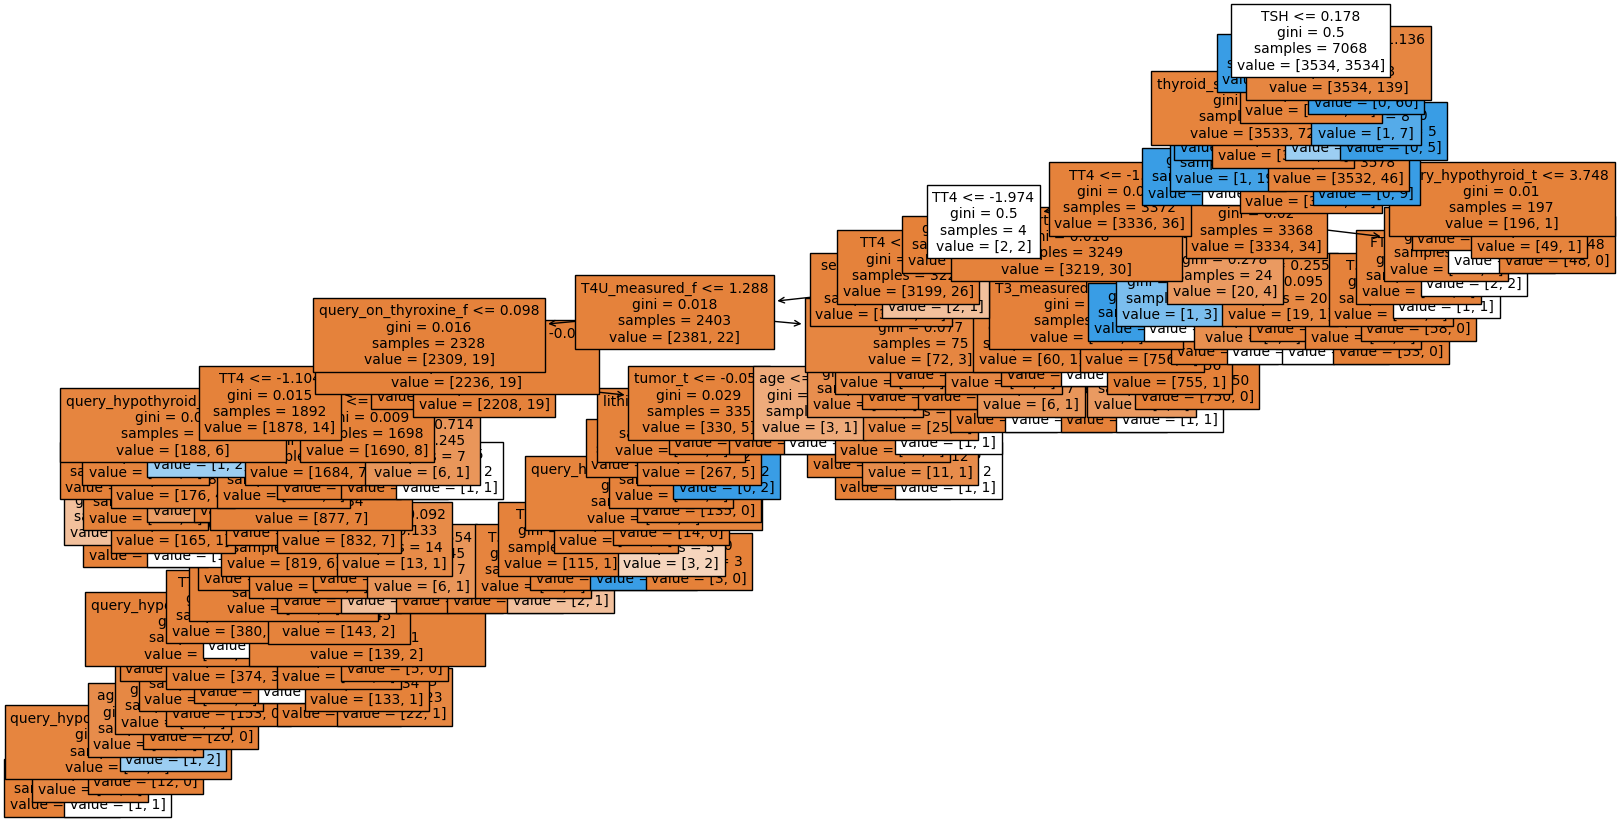

In [62]:
import matplotlib.pyplot as plt
from sklearn.tree import _export

# Get the first tree from the forest
tree_to_plot = rf.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
_export.plot_tree(tree_to_plot, feature_names=x.columns, filled=True, fontsize=10)
plt.show()